In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# ÂÆö‰πâÊñá‰ª∂Ë∑ØÂæÑ
file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"

# ËØªÂèñExcelÊñá‰ª∂‰∏≠ÁöÑoriginÂ∑•‰ΩúË°®
try:
    df = pd.read_excel(file_path, sheet_name='origin')
    print("Êï∞ÊçÆËØªÂèñÊàêÂäüÔºåÂéüÂßãÊï∞ÊçÆÂΩ¢Áä∂Ôºö", df.shape)
except Exception as e:
    print(f"ËØªÂèñÊñá‰ª∂Êó∂Âá∫Èîô: {e}")
    exit()

# ÂÆö‰πâÈúÄË¶ÅÂ§ÑÁêÜÁöÑËøûÁª≠ÂûãÁâπÂæÅÂàóË°®
continuous_features = [
    'bmi', 'waist_size', 'blood_pressure', 'heart_rate', 'cholesterol',
    'glucose', 'insulin', 'sleep_hours', 'work_hours', 'daily_steps',
    'calorie_intake', 'sugar_intake', 'water_intake', 'screen_time', 'income'
]

# Ê£ÄÊü•ÁâπÂæÅÊòØÂê¶ÈÉΩÂ≠òÂú®‰∫éÊï∞ÊçÆ‰∏≠
missing_features = [feat for feat in continuous_features if feat not in df.columns]
if missing_features:
    print(f"Ë≠¶ÂëäÔºöÊï∞ÊçÆ‰∏≠Áº∫Â∞ë‰ª•‰∏ãÁâπÂæÅ: {missing_features}")
    # Âè™‰øùÁïôÂ≠òÂú®ÁöÑÁâπÂæÅ
    continuous_features = [feat for feat in continuous_features if feat in df.columns]
    if not continuous_features:
        print("Ê≤°ÊúâÂèØÂ§ÑÁêÜÁöÑÁâπÂæÅÔºåÁ®ãÂ∫èÈÄÄÂá∫")
        exit()

# ÊèêÂèñÈúÄË¶ÅÂ§ÑÁêÜÁöÑÁâπÂæÅÊï∞ÊçÆ
data = df[continuous_features].copy()

# Ê£ÄÊü•Âπ∂Â§ÑÁêÜÁº∫Â§±ÂÄº
print("\nÁº∫Â§±ÂÄºÁªüËÆ°:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Â°´ÂÖÖÁº∫Â§±ÂÄºÔºà‰ΩøÁî®ÂàóÁöÑÂùáÂÄºÔºâ
data = data.fillna(data.mean())

# Ê†áÂáÜÂåñÂ§ÑÁêÜ
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Â∞ÜÊ†áÂáÜÂåñÂêéÁöÑÊï∞ÊçÆËΩ¨Êç¢‰∏∫DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=continuous_features)

# ÊâìÂç∞Ê†áÂáÜÂåñÂêéÁöÑÂâç5Ë°åÊï∞ÊçÆÔºåÊü•ÁúãÂ§ÑÁêÜÁªìÊûú
print("\nÊ†áÂáÜÂåñÂêéÁöÑÂâç5Ë°åÊï∞ÊçÆ:")
print(data_scaled_df.head())

# ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄßÔºà‰ΩøÁî®ÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞Ôºâ
correlation_matrix = data_scaled_df.corr(method='pearson')

# ÊâìÂç∞Áõ∏ÂÖ≥ÊÄßÁü©Èòµ
print("\nÁâπÂæÅÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÁü©Èòµ:")
print(correlation_matrix)

# ÂèØ‰ª•ÈÄâÊã©ÊâìÂç∞Áõ∏ÂÖ≥ÊÄßËæÉÂº∫ÁöÑÁâπÂæÅÂØπÔºàÁªùÂØπÂÄºÂ§ß‰∫é0.5ÁöÑÔºâ
print("\nÁõ∏ÂÖ≥ÊÄßËæÉÂº∫ÁöÑÁâπÂæÅÂØπÔºà|r| > 0.5Ôºâ:")
strong_correlations = []
for i in range(len(continuous_features)):
    for j in range(i+1, len(continuous_features)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.5:
            strong_correlations.append((
                continuous_features[i],
                continuous_features[j],
                round(corr, 4)
            ))

# ÊåâÁõ∏ÂÖ≥ÊÄßÁªùÂØπÂÄºÊéíÂ∫è
strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

for corr_pair in strong_correlations:
    print(f"{corr_pair[0]} ‰∏é {corr_pair[1]}: {corr_pair[2]}")


Êï∞ÊçÆËØªÂèñÊàêÂäüÔºåÂéüÂßãÊï∞ÊçÆÂΩ¢Áä∂Ôºö (13245, 45)

Áº∫Â§±ÂÄºÁªüËÆ°:
Series([], dtype: int64)

Ê†áÂáÜÂåñÂêéÁöÑÂâç5Ë°åÊï∞ÊçÆ:
        bmi  waist_size  blood_pressure  heart_rate  cholesterol   glucose  \
0  1.052573   -1.089741       -0.535699   -0.807060    -0.337700  1.953009   
1  1.130938   -0.973061        0.708790    0.922871     0.924748 -0.581677   
2  0.305443   -0.311178        0.518101    0.128046    -0.679496  0.575500   
3 -0.374604   -1.519955       -0.778455    2.035233     1.340566 -0.011265   
4 -0.797504   -0.786358        0.549090   -0.656015     0.373149  0.685818   

    insulin  sleep_hours  work_hours  daily_steps  calorie_intake  \
0 -1.075518     0.607150   -0.560377    -0.839360       -0.482024   
1  0.885453     0.818443   -1.366139     0.885101       -0.174991   
2  3.217386    -0.481150   -1.651583     1.248953       -0.339706   
3 -0.423360    -2.054639    0.198033    -0.377252       -0.505390   
4 -1.331548    -0.283489   -1.270495    -1.062987       -

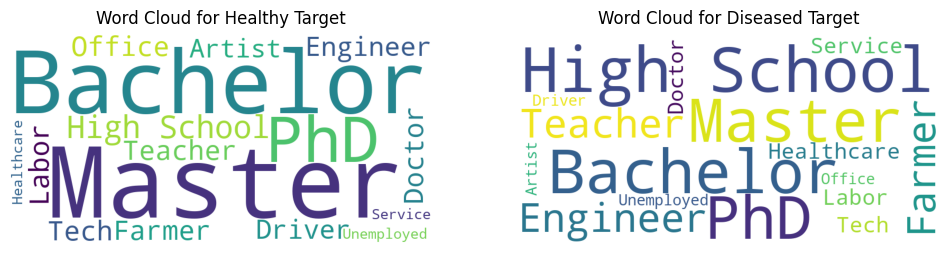

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Êñá‰ª∂Ë∑ØÂæÑ
file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"
# ËØªÂèñ Excel Êñá‰ª∂‰∏≠ÁöÑ origin Â∑•‰ΩúË°®
df = pd.read_excel(file_path, sheet_name='origin')

# Ë¶ÅÂàÜÊûêÁöÑÂàó
columns_to_analyze = ['education_level', 'job_type', 'occupation']
# ÁõÆÊ†áÂàó
target_column = 'target'

# ÂàÜÂà´Ëé∑Âèñ target ‰∏∫ healthy Âíå diseased ÁöÑÊï∞ÊçÆ
healthy_data = df[df[target_column] == 'healthy']
diseased_data = df[df[target_column] == 'diseased']

# ÂÆö‰πâÂáΩÊï∞ÔºåÁî®‰∫éÁªüËÆ°ËØçÊ±áÈ¢ëÁéáÂπ∂ÁîüÊàêËØç‰∫ë
def generate_wordcloud(data, columns):
    # Â≠òÂÇ®ËØçÊ±áÂèäÂÖ∂Âá∫Áé∞Ê¨°Êï∞
    word_freq = {}
    for col in columns:
        # ÈÅçÂéÜÂΩìÂâçÂàóÁöÑÊØè‰∏™ÂÖÉÁ¥†
        for word in data[col].astype(str):
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1
    # ÁîüÊàêËØç‰∫ëÔºåÈÄöËøá‰º†ÂÖ•Â≠óÂÖ∏ÂΩ¢ÂºèÁöÑËØçÈ¢ëÊï∞ÊçÆ
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    return wordcloud

# ÁîüÊàê healthy Âíå diseased ÂØπÂ∫îÁöÑËØç‰∫ë
healthy_wordcloud = generate_wordcloud(healthy_data, columns_to_analyze)
diseased_wordcloud = generate_wordcloud(diseased_data, columns_to_analyze)

# ÁªòÂà∂ËØç‰∫ëÂõæ
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(healthy_wordcloud)
plt.title('Word Cloud for Healthy Target')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(diseased_wordcloud)
plt.title('Word Cloud for Diseased Target')
plt.axis('off')

plt.show()

Êï∞ÊçÆËØªÂèñÊàêÂäü


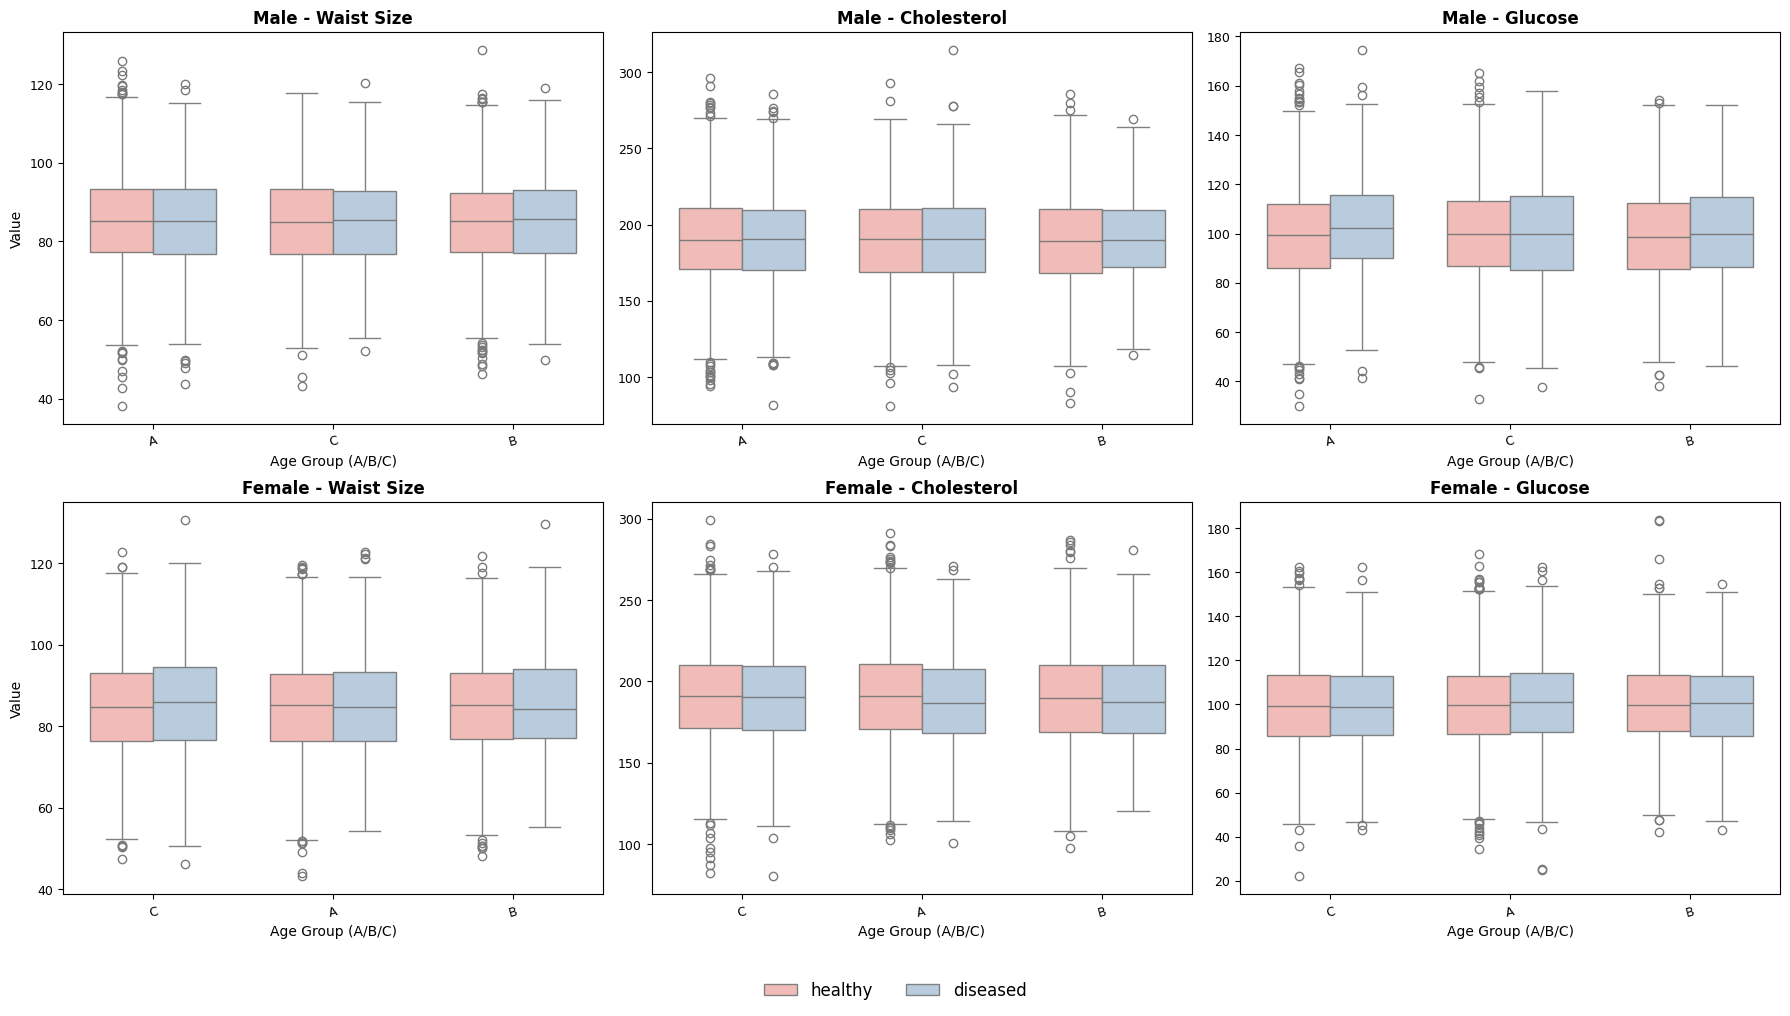

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Êñá‰ª∂Ë∑ØÂæÑ
file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"

# ËØªÂèñExcelÊï∞ÊçÆ
try:
    df = pd.read_excel(file_path, sheet_name='origin')
    print("Êï∞ÊçÆËØªÂèñÊàêÂäü")
except Exception as e:
    print(f"ËØªÂèñÊñá‰ª∂ÈîôËØØ: {e}")
    exit()

# È™åËØÅÊâÄÈúÄÂàóÊòØÂê¶Â≠òÂú®
required_columns = ['age_group', 'gender', 'target', 'waist_size', 'cholesterol', 'glucose']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"ÈîôËØØÔºöÁº∫Â∞ëÂøÖË¶ÅÁöÑÂàó - {missing_columns}")
    exit()

# ÂÆö‰πâË¶ÅÁªòÂà∂ÁöÑÊåáÊ†áÂèäÂÖ∂ÂêçÁß∞
indicators = {
    'waist_size': 'Waist Size',
    'cholesterol': 'Cholesterol',
    'glucose': 'Glucose'
}

# ËÆæÁΩÆÁªòÂõæÈ£éÊ†º
plt.style.use('default')
sns.set_palette('Pastel1')

# ÂàõÂª∫ÂÖ≠ÂÆ´Ê†ºÂ∏ÉÂ±ÄÔºà2Ë°å√ó3ÂàóÔºâ
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3, figure=fig)

# Â≠òÂÇ®Âõæ‰æãÂºïÁî®ÔºåÁ°Æ‰øùÂè™ÊòæÁ§∫‰∏Ä‰∏™
handles, labels = None, None

# ÈÅçÂéÜÊÄßÂà´ÂíåÊåáÊ†áÁªòÂõæ
for row_idx, gender in enumerate(['male', 'female']):
    for col_idx, (indicator, indicator_name) in enumerate(indicators.items()):
        # Ëé∑ÂèñÂΩìÂâçÂ≠êÂõæ‰ΩçÁΩÆ
        ax = fig.add_subplot(gs[row_idx, col_idx])

        # Á≠õÈÄâÂΩìÂâçÊÄßÂà´ÂíåÊåáÊ†áÁöÑÊï∞ÊçÆ
        gender_data = df[df['gender'] == gender]

        # ÁªòÂà∂ÁÆ±Á∫øÂõæ
        sns.boxplot(
            x='age_group',
            y=indicator,
            hue='target',
            data=gender_data,
            ax=ax,
            palette='Pastel1',
            width=0.7,
            #showmeans=True,  # ÊòæÁ§∫ÂùáÂÄº
            #medianprops={'color': 'none'},  # ÈöêËóè‰∏≠‰ΩçÁ∫ø
            boxprops={'edgecolor': 'gray'},  # ÁÆ±‰ΩìËæπÊ°ÜÈ¢úËâ≤
            whiskerprops={'color': 'gray'},  # È°ªÁ∫øÈ¢úËâ≤
            capprops={'color': 'gray'}  # È°ªÁ∫øÂ∏ΩÈ¢úËâ≤
        )

        # ËÆæÁΩÆÊ†áÈ¢òÂíåÊ†áÁ≠æ
        ax.set_title(f'{gender.capitalize()} - {indicator_name}', fontweight='bold', fontsize=12)
        ax.set_xlabel('Age Group (A/B/C)', fontsize=10)

        # Âè™Âú®Á¨¨‰∏ÄÂàóÊòæÁ§∫yËΩ¥Ê†áÁ≠æ
        if col_idx == 0:
            ax.set_ylabel('Value', fontsize=10)
        else:
            ax.set_ylabel('')

        # ÊóãËΩ¨xËΩ¥Ê†áÁ≠æ
        ax.tick_params(axis='x', rotation=15, labelsize=9)
        ax.tick_params(axis='y', labelsize=9)

        # Ëé∑ÂèñÂõæ‰æãÂºïÁî®ÔºàÂè™ÈúÄË¶Å‰∏ÄÊ¨°Ôºâ
        if handles is None and labels is None:
            handles, labels = ax.get_legend_handles_labels()

        # ÁßªÈô§Â≠êÂõæ‰∏≠ÁöÑÂõæ‰æã
        ax.get_legend().remove()

# Ê∑ªÂä†ÂÖ®Â±ÄÂõæ‰æã
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12,
           bbox_to_anchor=(0.5, -0.02), frameon=False)

# Ë∞ÉÊï¥Â∏ÉÂ±Ä
plt.tight_layout()
fig.subplots_adjust(bottom=0.1)  # ‰∏∫Â∫ïÈÉ®Âõæ‰æãÁïôÂá∫Á©∫Èó¥

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()


In [8]:
print("yes")

yes


Êï∞ÊçÆËØªÂèñÊàêÂäüÔºåÂéüÂßãÊï∞ÊçÆÂΩ¢Áä∂: (13245, 4)


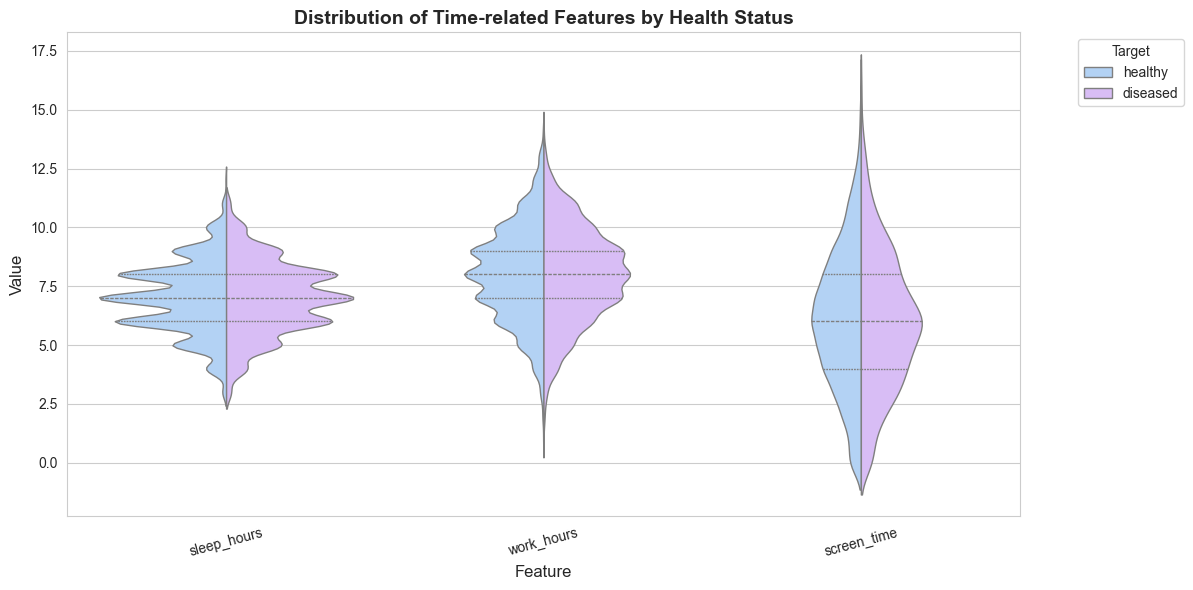

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Êñá‰ª∂Ë∑ØÂæÑ
file_path = r"D:\111PythonLearning\data\hour.csv"

# ËØªÂèñ CSV Êï∞ÊçÆ
try:
    df = pd.read_csv(file_path)
    print("Êï∞ÊçÆËØªÂèñÊàêÂäüÔºåÂéüÂßãÊï∞ÊçÆÂΩ¢Áä∂:", df.shape)
except Exception as e:
    print(f"ËØªÂèñÊñá‰ª∂ÈîôËØØ: {e}")
    exit()

# È™åËØÅÂøÖË¶ÅÂàóÂ≠òÂú®
required_columns = ['target', 'sleep_hours', 'work_hours', 'screen_time']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"ÈîôËØØÔºöÁº∫Â∞ëÂøÖË¶ÅÁöÑÂàó - {missing_columns}")
    exit()
sampled_dfs = []
for target in ['healthy', 'diseased']:
    target_df = df[df['target'] == target]
    sampled_df = target_df.sample(frac=0.4, random_state=42)  # ÊåâÊØî‰æãÊäΩÊ†∑
    sampled_dfs.append(sampled_df)
sampled_df = pd.concat(sampled_dfs, ignore_index=True)

# ÈáçÂ°ëÊï∞ÊçÆ‰∏∫ÈïøÊ†ºÂºèÔºàÊñπ‰æø seaborn ÁªòÂõæÔºâ
melt_df = pd.melt(
    sampled_df,
    id_vars=['target'],
    value_vars=['sleep_hours', 'work_hours', 'screen_time'],
    var_name='feature',
    value_name='value'
)

# ËÆæÁΩÆÁªòÂõæÈ£éÊ†º
sns.set_style("whitegrid")
sns.set_palette("Set2")

# ÁªòÂà∂Â∞èÊèêÁê¥Âõæ
plt.figure(figsize=(12, 6))
ax = sns.violinplot(
    x='feature',          # Ê®™ÂùêÊ†á‰∏∫ÁâπÂæÅÂêçÁß∞Ôºàsleep_hoursÁ≠âÔºâ
    y='value',            # Á∫µÂùêÊ†á‰∏∫ÁâπÂæÅÂÄº
    hue='target',         # Êåâ target ÂàÜÁªÑ
    data=melt_df,
    split=True,           # Âêå‰∏Ä x ‰∏ãÔºå‰∏çÂêå target ÂàÜÂºÄÂ±ïÁ§∫
    inner='quartile',     # ÊòæÁ§∫ÂõõÂàÜ‰ΩçÊï∞
    linewidth=1,
    palette=['#a8d1ff', '#d8b4fe']  # ÂÅ•Â∫∑„ÄÅÁñæÁóÖÂàÜÁªÑÈ¢úËâ≤
)

# ÂõæÂΩ¢ÁæéÂåñ
plt.title('Distribution of Time-related Features by Health Status', fontsize=14, fontweight='bold')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=15)  # ÊóãËΩ¨ x ËΩ¥Ê†áÁ≠æÔºåÈÅøÂÖçÈáçÂè†

# Ë∞ÉÊï¥Âõæ‰æã‰ΩçÁΩÆ
plt.legend(title='Target', loc='upper right', bbox_to_anchor=(1.18, 1))

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÂÆö‰πâÊüîÂíåÈÖçËâ≤ÔºàÂ§áÁî®ÔºåÊ≠§Â§Ñ‰∏ªË¶ÅÁî®‰∏ãÈù¢ÁöÑÂõ∫ÂÆöÈ¢úËâ≤Ôºâ
soft_palette = sns.color_palette("pastel")

# diet_typeÂõõÁßçÂõ∫ÂÆöÈ¢úËâ≤
diet_colors = {
    'Vegetarian': '#a8e6cf',    # ÊµÖËñÑËç∑Áªø
    'Keto': '#ffaaa5',          # ÊµÖÁèäÁëöËâ≤
    'Vegan': '#dcedc1',         # ÊµÖËçâÁªøËâ≤
    'Omnivore': '#ffd3b6'       # ÊµÖÊ©ôËâ≤
}

# exercise_type‰∏âÁßçÂõ∫ÂÆöÈ¢úËâ≤
exercise_colors = {
    'Cardio': '#b8e986',        # ÊµÖÁªøËâ≤
    'Strength': '#86c2e9',      # ÊµÖËìùËâ≤
    'Mixed': '#f8c5e3'          # ÊµÖÁ≤âËâ≤
}

# ËØªÂèñÊï∞ÊçÆ
file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"
df = pd.read_excel(file_path, sheet_name='origin')

# È™åËØÅÂøÖË¶ÅÂàóÊòØÂê¶Â≠òÂú®
required_cols = ['target', 'age_group', 'diet_type', 'exercise_type']
missing_cols = set(required_cols) - set(df.columns)
if missing_cols:
    raise ValueError(f"Êï∞ÊçÆÁº∫Â∞ëÂàóÔºö{missing_cols}")

# ÂàÜÊûêÁª¥Â∫¶ÂÆö‰πâ
targets = ['healthy', 'diseased']       # ÂÅ•Â∫∑Áä∂ÊÄÅ
age_groups = ['A', 'B', 'C']           # Âπ¥ÈæÑÁªÑ
features = ['diet_type', 'exercise_type']  # ÂàÜÊûêÁâπÂæÅ

# ÂàõÂª∫ 2 Ë°å√ó6 ÂàóÂ∏ÉÂ±ÄÔºà12 Âº†Â≠êÂõæÔºâ
fig, axes = plt.subplots(2, 6, figsize=(22, 8), dpi=100)
axes = axes.flatten()  # ËΩ¨‰∏∫‰∏ÄÁª¥Êï∞ÁªÑÊñπ‰æøÁ¥¢Âºï

# ÈÅçÂéÜÁîüÊàêÊâÄÊúâÂ≠êÂõæ
for subplot_idx, target in enumerate(targets):
    for feature in features:
        for age_group in age_groups:
            # ËÆ°ÁÆóÂ≠êÂõæÁ¥¢Âºï
            ax_idx = subplot_idx * 6 + (features.index(feature) * 3 + age_groups.index(age_group))
            ax = axes[ax_idx]

            # Á≠õÈÄâÊï∞ÊçÆÔºàËøáÊª§Á©∫ÂÄºÔºâ
            mask = (df['target'] == target) & (df['age_group'] == age_group)
            filtered = df[mask][feature].dropna()  # ‰∏¢ÂºÉÁ©∫ÂÄº

            if filtered.empty:
                ax.axis('off')  # Á©∫Êï∞ÊçÆÈöêËóèÂùêÊ†áËΩ¥
                continue

            # ËÆ°ÁÆóÁ±ªÂà´Âç†ÊØîÔºàÁôæÂàÜÊØîÔºâ
            value_counts = filtered.value_counts(normalize=True) * 100

            # ÊûÑÂª∫È•ºÂõæÊ†áÁ≠æÔºà‰ΩøÁî®Êç¢Ë°åÁ¨¶ \nÔºå‰ªÖÁî®‰∫éÈ•ºÂõæÊòæÁ§∫Ôºâ
            pie_labels = [f"{label}\n{round(percent, 1)}%" for label, percent in value_counts.items()]

            # Ê†πÊçÆÁâπÂæÅÈÄâÊã©ÂØπÂ∫îÁöÑÈ¢úËâ≤Â≠óÂÖ∏ÔºåÂπ∂ÊåâÁ±ªÂà´È°∫Â∫èÊèêÂèñÈ¢úËâ≤
            if feature == 'diet_type':
                # ‰ªédiet_colors‰∏≠ÊåâÂΩìÂâçÁ±ªÂà´È°∫Â∫èÂèñËâ≤
                colors = [diet_colors[label] for label in value_counts.index]
            else:  # exercise_type
                # ‰ªéexercise_colors‰∏≠ÊåâÂΩìÂâçÁ±ªÂà´È°∫Â∫èÂèñËâ≤
                colors = [exercise_colors[label] for label in value_counts.index]

            # ÁªòÂà∂È•ºÂõæÔºà‰ΩøÁî®ÁâπÂæÅÂØπÂ∫îÁöÑÂõ∫ÂÆöÈ¢úËâ≤Ôºâ
            wedges, texts = ax.pie(
                value_counts,
                labels=pie_labels,
                startangle=90,
                colors=colors,  # Ê≠§Â§Ñ‰ΩøÁî®‰∏äÈù¢ÊèêÂèñÁöÑÂõ∫ÂÆöÈ¢úËâ≤
                wedgeprops={"width": 0.6},  # Á¥ßÂáëÁéØÂΩ¢
                textprops={"fontsize": 9, "color": "#555555"}  # Ê†áÁ≠æÊ†∑Âºè
            )

            # ËÆæÁΩÆÊ†áÈ¢òÔºàÁ∫ØËã±ÊñáÔºåÈÅøÂÖçÂ≠ó‰ΩìÈóÆÈ¢òÔºâ
            ax.set_title(
                f"{target.capitalize()} ¬∑ Group {age_group} ¬∑ {feature}",
                fontsize=11,
                pad=15
            )

            # ÊûÑÂª∫Âõæ‰æãÊ†áÁ≠æ
            legend_labels = [f"{label} ({round(percent, 1)}%)" for label, percent in value_counts.items()]

            # Ê∑ªÂä†Âõæ‰æã
            ax.legend(
                wedges,
                legend_labels,
                loc="upper right",
                bbox_to_anchor=(1.3, 1.1),
                fontsize=8
            )

# ÂÖ®Â±ÄÂ∏ÉÂ±ÄË∞ÉÊï¥
plt.tight_layout()
plt.subplots_adjust(
    top=0.88,    # È°∂ÈÉ®Èó¥Ë∑ù
    wspace=0.4,  # ÂàóÈó¥Ë∑ù
    hspace=0.3   # Ë°åÈó¥Ë∑ù
)
plt.suptitle(
    "Distribution of Diet/Exercise Types by Health Status and Age Group",
    fontsize=16,
    y=0.95
)

plt.show()

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator  # Áî®‰∫éÁªÜÂåñÂùêÊ†áËΩ¥ÂàªÂ∫¶

file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"
try:
    df = pd.read_excel(file_path, sheet_name='origin')
except Exception as e:
    print(f"Êñá‰ª∂ËØªÂèñÂ§±Ë¥•Ôºö{e}")
    exit()

# Ê†°È™åÂøÖÈúÄÂàóÊòØÂê¶Â≠òÂú®
required_columns = ['age_group', 'target', 'stress_level', 'mental_health_score']
missing = [col for col in required_columns if col not in df.columns]
if missing:
    print(f"ÈîôËØØÔºöÁº∫Â∞ëÂàó {missing}")
    exit()

# ÊåâÂπ¥ÈæÑÁªÑÔºàA/B/CÔºâÂíåÂÅ•Â∫∑Áä∂ÊÄÅÔºàhealthy/diseasedÔºâÂàÜÁªÑÔºåËÆ°ÁÆóÊåáÊ†áÂùáÂÄº
grouped_stress = df.groupby(['age_group', 'target'])['stress_level'].mean().unstack()
grouped_mental = df.groupby(['age_group', 'target'])['mental_health_score'].mean().unstack()

sns.set_style("whitegrid")  # ÁôΩËâ≤ÁΩëÊ†ºËÉåÊôØÔºåÊõ¥Ê∏ÖÁàΩ
# Âõ∫ÂÆöÈÖçËâ≤Ôºàdiseased=Ê∑±ËìùËâ≤Ôºåhealthy=ÊöñÊ©ôËâ≤ÔºåÂØπÊØîÂº∫ÁÉàÔºâ
COLORS = {'diseased': '#457B9D', 'healthy': '#E63946'}

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=False)  # ‰∏§Âº†ÂõæÁã¨Á´ãËÆæÁΩÆyËΩ¥ÔºåÈÅøÂÖçËåÉÂõ¥Ë¢´ÂéãÁº©

ax_stress = axes[0]
grouped_stress.plot(
    kind='bar',
    ax=ax_stress,
    width=0.6,  # Êü±Â≠êÂÆΩÂ∫¶ÔºåÂπ≥Ë°°Èó¥Ë∑ùÂíåËßÜËßâÊïàÊûú
    color=[COLORS['diseased'], COLORS['healthy']]
)
ax_stress.set_title('Stress Level by Age Group and Health Status', fontsize=14, fontweight='bold')
ax_stress.set_xlabel('Age Group (A/B/C)', fontsize=12)
ax_stress.set_ylabel('Stress Level', fontsize=12)
ax_stress.tick_params(axis='x', rotation=0, labelsize=10)  # xËΩ¥Ê†áÁ≠æ‰∏çÊóãËΩ¨ÔºåÊõ¥Ê∏ÖÊô∞

# ÁªÜÂåñyËΩ¥ÂàªÂ∫¶ÔºöÊØè0.2‰∏Ä‰∏™ÂàªÂ∫¶ÔºåÁ™ÅÂá∫ÁªÜÂæÆÂ∑ÆÂºÇ
ax_stress.yaxis.set_major_locator(MultipleLocator(0.2))
# Ë∞ÉÊï¥yËΩ¥ËåÉÂõ¥ÔºàÊ†πÊçÆÂÆûÈôÖÊï∞ÊçÆÔºåÂÅáËÆæÂùáÂÄºÂú®4.5~5.2‰πãÈó¥ÔºåÂèØËá™Ë°å‰øÆÊîπÔºâ
ax_stress.set_ylim(bottom=4.5, top=5.2)

# Ê∑ªÂä†Êï∞ÊçÆÊ†áÁ≠æÔºàÊü±Â≠êÈ°∂ÈÉ®ÊòæÁ§∫ÂÖ∑‰ΩìÂÄºÔºå‰øùÁïô2‰ΩçÂ∞èÊï∞Ôºâ
for p in ax_stress.patches:
    height = p.get_height()
    ax_stress.annotate(
        f'{height:.2f}',
        xy=(p.get_x() + p.get_width()/2, height),
        xytext=(0, 4),  # Ê†áÁ≠æÂú®Êü±Â≠ê‰∏äÊñπ4ÂÉèÁ¥†
        textcoords="offset points",
        ha='center', va='bottom', fontsize=9
    )

ax_mental = axes[1]
grouped_mental.plot(
    kind='bar',
    ax=ax_mental,
    width=0.6,
    color=[COLORS['diseased'], COLORS['healthy']]
)
ax_mental.set_title('Mental Health Score by Age Group and Health Status', fontsize=14, fontweight='bold')
ax_mental.set_xlabel('Age Group (A/B/C)', fontsize=12)
ax_mental.set_ylabel('Mental Health Score', fontsize=12)
ax_mental.tick_params(axis='x', rotation=0, labelsize=10)

# ÁªÜÂåñyËΩ¥ÂàªÂ∫¶ÔºàÂêåstress_levelÁöÑÈÄªËæëÔºâ
ax_mental.yaxis.set_major_locator(MultipleLocator(0.2))
ax_mental.set_ylim(bottom=4.5, top=5.2)  # ÂêåÊ≠•ËåÉÂõ¥ÔºåÊñπ‰æøÂØπÊØî

# Ê∑ªÂä†Êï∞ÊçÆÊ†áÁ≠æ
for p in ax_mental.patches:
    height = p.get_height()
    ax_mental.annotate(
        f'{height:.2f}',
        xy=(p.get_x() + p.get_width()/2, height),
        xytext=(0, 4),
        textcoords="offset points",
        ha='center', va='bottom', fontsize=9
    )

handles, labels = ax_stress.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='lower center',  # Â∫ïÈÉ®‰∏≠Â§Æ
    ncol=2, fontsize=12,
    bbox_to_anchor=(0.5, -0.12)  # Ë∞ÉÊï¥‰ΩçÁΩÆÔºåÈÅøÂÖçÈÅÆÊå°
)

# ÁßªÈô§Â≠êÂõæÂÜÖÁöÑÂõæ‰æãÔºàÁªü‰∏ÄÁî®Â∫ïÈÉ®Âõæ‰æãÔºâ
ax_stress.get_legend().remove()
ax_mental.get_legend().remove()

plt.tight_layout()  # Ëá™Âä®Ë∞ÉÊï¥Èó¥Ë∑ù
plt.subplots_adjust(bottom=0.2)  # ÁªôÂ∫ïÈÉ®Âõæ‰æãÁïôÁ©∫Èó¥

plt.show()

Ëøô‰∏™‰∏çÂ§™ÊàêÂäüÔºåÂêéÈù¢Ê¥óÊï∞ÊçÆËØï‰∫Ü‰∏Ä‰∏ã‚Ä¶‚Ä¶ÊïàÊûúÂ•Ω‰∫Ü‰∏Ä‰∫õ‰ΩÜËøòÊòØ‰∏çÂ§™Â§ü

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

# ---------------------- 1. Êï∞ÊçÆËØªÂèñ‰∏éÂü∫Êú¨Êü•Áúã ----------------------
file_path = r"D:\111PythonLearning\data\health_lifestyle.xlsx"
try:
    df = pd.read_excel(file_path, sheet_name='origin')
    print(f"Êï∞ÊçÆËØªÂèñÊàêÂäüÔºåÂΩ¢Áä∂Ôºö{df.shape}")
    print("Ââç5Ë°åÊï∞ÊçÆÔºö")
    print(df.head())
except Exception as e:
    print(f"ËØªÂèñÊñá‰ª∂ÈîôËØØÔºö{e}")
    exit()

# ÂÆö‰πâÁâπÂæÅÂàóÂíåÁõÆÊ†áÂàó
feature_cols = ['age_group', 'healthcare_access', 'insurance', 'sunlight_exposure', 'family_history', 'pet_owner']
target_col = 'target'

# Ê£ÄÊü•ÂøÖË¶ÅÂàóÊòØÂê¶Â≠òÂú®
missing_cols = [col for col in feature_cols + [target_col] if col not in df.columns]
if missing_cols:
    print(f"ÈîôËØØÔºöÁº∫Â∞ëÂøÖË¶ÅÂàó {missing_cols}")
    exit()

# Êü•ÁúãÁõÆÊ†áÂèòÈáèÂàÜÂ∏ÉÔºàÂà§Êñ≠ÊòØÂê¶Âπ≥Ë°°Ôºâ
print("\nÁõÆÊ†áÂèòÈáèÂàÜÂ∏ÉÔºö")
print(df[target_col].value_counts(normalize=True))


# ---------------------- 2. Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÔºàÂàÜÁ±ªÁâπÂæÅÁºñÁ†ÅÔºâ ----------------------
# ÊâÄÊúâÁâπÂæÅÈÉΩÊòØÂàÜÁ±ªÁâπÂæÅÔºåÈúÄË¶ÅËøõË°åÁã¨ÁÉ≠ÁºñÁ†ÅÔºàOne-Hot EncodingÔºâ
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), feature_cols)  # drop='first'ÈÅøÂÖçÂ§öÈáçÂÖ±Á∫øÊÄß
    ])

# ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÔºà7:3Ôºâ
X = df[feature_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # stratify‰øùËØÅÁõÆÊ†áÂèòÈáèÂàÜÂ∏É‰∏ÄËá¥
)


# ---------------------- 3. ÊûÑÂª∫ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã ----------------------
# ÁÆ°ÈÅìÔºöÈ¢ÑÂ§ÑÁêÜ+Ê®°ÂûãÔºàÈÅøÂÖçÊï∞ÊçÆÊ≥ÑÈú≤Ôºâ
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,  # 100Ê£µÊ†ëÔºàÂπ≥Ë°°ÊÄßËÉΩÂíåÈÄüÂ∫¶Ôºâ
        max_depth=5,       # ÈôêÂà∂Ê†ëÊ∑±Â∫¶ÔºåÈÅøÂÖçËøáÊãüÂêà
        min_samples_split=10,  # Ëá≥Â∞ë10‰∏™Ê†∑Êú¨ÊâçÂàÜË£Ç
        random_state=42,
        n_jobs=-1  # Âπ∂Ë°åËÆ°ÁÆóÔºåÂä†ÈÄüËÆ≠ÁªÉ
    ))
])

# ËÆ≠ÁªÉÊ®°Âûã
model.fit(X_train, y_train)

# ‰∫§ÂèâÈ™åËØÅËØÑ‰º∞ÔºàÊõ¥Á®≥ÂÅ•Ôºâ
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"\n5Êäò‰∫§ÂèâÈ™åËØÅÂáÜÁ°ÆÁéáÔºö{cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}")

# ÊµãËØïÈõÜËØÑ‰º∞
y_pred = model.predict(X_test)
print("\nÊµãËØïÈõÜÂàÜÁ±ªÊä•ÂëäÔºö")
print(classification_report(y_test, y_pred))
print("Ê∑∑Ê∑ÜÁü©ÈòµÔºö")
print(confusion_matrix(y_test, y_pred))


# ---------------------- 4. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê ----------------------
# Ëé∑ÂèñÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÂêçÔºàÁî®‰∫éËß£ËØªÔºâ
encoder = preprocessor.named_transformers_['cat']
encoded_feature_names = list(encoder.get_feature_names_out(feature_cols))

# ËÆ°ÁÆóÁâπÂæÅÈáçË¶ÅÊÄßÔºàÈöèÊú∫Ê£ÆÊûóËá™Â∏¶Ôºâ
rf = model.named_steps['classifier']
feature_importance = pd.DataFrame({
    'ÁâπÂæÅ': encoded_feature_names,
    'ÈáçË¶ÅÊÄß': rf.feature_importances_
}).sort_values(by='ÈáçË¶ÅÊÄß', ascending=False)

# ÂèØËßÜÂåñÂâç10ÈáçË¶ÅÁâπÂæÅ
plt.figure(figsize=(10, 6))
sns.barplot(x='ÈáçË¶ÅÊÄß', y='ÁâπÂæÅ', data=feature_importance.head(10))
plt.title('ÁâπÂæÅÈáçË¶ÅÊÄßÔºàÈöèÊú∫Ê£ÆÊûóÔºâ', fontsize=12)
plt.tight_layout()
plt.show()


# ---------------------- 5. ÊåñÊéòËßÑÂæãÔºàÁâπÂæÅÁªÑÂêàÂàÜÊûêÔºâ ----------------------
def find_rules(df, feature_cols, target_col, top_n=10):
    """ÊåñÊéòÁâπÂæÅÁªÑÂêà‰∏éÁõÆÊ†áÂèòÈáèÁöÑÂÖ≥ËÅîËßÑÂàô"""
    # ÊåâÁâπÂæÅÁªÑÂêàÂàÜÁªÑÔºåËÆ°ÁÆóÊÇ£ÁóÖÊØî‰æã
    grouped = df.groupby(feature_cols)[target_col].apply(
        lambda x: (x == 'diseased').mean()  # ÊÇ£ÁóÖÊØî‰æã
    ).reset_index(name='diseased_ratio')

    # ËÆ°ÁÆóÊØèÁªÑÊ†∑Êú¨Èáè
    count_df = df.groupby(feature_cols).size().reset_index(name='Ê†∑Êú¨Èáè')
    rules = pd.merge(grouped, count_df, on=feature_cols)

    # Á≠õÈÄâÊ†∑Êú¨ÈáèË∂≥Â§üÁöÑÁªÑÔºàËá≥Â∞ë50‰∏™Ê†∑Êú¨Ôºå‰øùËØÅÂèØÈù†ÊÄßÔºâ
    rules = rules[rules['Ê†∑Êú¨Èáè'] >= 50]

    # ÂàÜÂà´ÂèñÊÇ£ÁóÖÊØî‰æãÊúÄÈ´òÂíåÊúÄ‰ΩéÁöÑËßÑÂàô
    high_risk = rules.sort_values(by='diseased_ratio', ascending=False).head(top_n)
    low_risk = rules.sort_values(by='diseased_ratio', ascending=True).head(top_n)

    print("\nÈ´òÈ£éÈô©ÁâπÂæÅÁªÑÂêàÔºàÊÇ£ÁóÖÊØî‰æãÈ´òÔºâÔºö")
    print(high_risk)
    print("\n‰ΩéÈ£éÈô©ÁâπÂæÅÁªÑÂêàÔºàÊÇ£ÁóÖÊØî‰æã‰ΩéÔºâÔºö")
    print(low_risk)
    return high_risk, low_risk

# ÊåñÊéòËßÑÂàô
high_risk_rules, low_risk_rules = find_rules(df, feature_cols, target_col)

Êï∞ÊçÆËØªÂèñÊàêÂäüÔºåÂΩ¢Áä∂Ôºö(13245, 45)
Ââç5Ë°åÊï∞ÊçÆÔºö
   survey_code gender age_group        bmi  waist_size  blood_pressure  \
0           11   male         A  30.731407   71.862592      111.870636   
1           13   male         A  31.200626   73.274294      130.436277   
2           15   male         A  26.257896   81.282398      127.591522   
3           25   male         C  22.186047   66.657447      108.249127   
4           28   male         A  19.653889   75.533214      128.053824   

   heart_rate  cholesterol     glucose    insulin  ...  pet_owner  \
0   66.922530   179.722343  138.632213   9.593523  ...        Yes   
1   84.101594   217.806217   88.310330  19.461592  ...        Yes   
2   76.208592   169.411486  111.284125  31.196429  ...         No   
3   95.147899   230.350060   99.634905  12.875334  ...         No   
4   68.422487   201.166287  113.474288   8.305118  ...        Yes   

   daily_supplement_dosage    target  Unnamed: 38  Unnamed: 39  Unnamed: 40  \
0 

D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\model_selection\_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\metrics\_scorer.py", line 152, in __call__
    score = scorer._score(
  File "D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\utils\_response.py", line 214, in _get_response_values
    y_pred = prediction_method(X)
  File "D:\APP\anaconda\envs\pytorch3\lib\site-packages\sklearn\pipeline.py", line 788, in predict
    Xt = transform.transform(Xt)
  File "D:\APP\anaconda\envs\pytorch3\lib\site-package


5Êäò‰∫§ÂèâÈ™åËØÅÂáÜÁ°ÆÁéáÔºönan ¬± nan

ÊµãËØïÈõÜÂàÜÁ±ªÊä•ÂëäÔºö
              precision    recall  f1-score   support

    diseased       0.00      0.00      0.00      1155
     healthy       0.71      1.00      0.83      2819

    accuracy                           0.71      3974
   macro avg       0.35      0.50      0.41      3974
weighted avg       0.50      0.71      0.59      3974

Ê∑∑Ê∑ÜÁü©ÈòµÔºö
[[   0 1155]
 [   0 2819]]


C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\3206084309.py:98: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missi


È´òÈ£éÈô©ÁâπÂæÅÁªÑÂêàÔºàÊÇ£ÁóÖÊØî‰æãÈ´òÔºâÔºö
    age_group healthcare_access insurance sunlight_exposure family_history  \
167         C              Good       Yes          Moderate            Yes   
123         B              Poor        No              High            Yes   
146         C              Good        No              High            Yes   
193         C              Poor        No              High             No   
144         C              Good        No              High             No   
43          A          Moderate       Yes               Low            Yes   
152         C              Good        No          Moderate             No   
166         C              Good       Yes          Moderate            Yes   
39          A          Moderate       Yes              High            Yes   
68          A              Poor       Yes          Moderate             No   

    pet_owner  diseased_ratio  Ê†∑Êú¨Èáè  
167       Yes        0.421875   64  
123       Yes 


üîç Áº∫Â§±ÂÄºÁªüËÆ°Ôºö
Series([], dtype: int64)
üßπ Âà†Èô§Áº∫Â§±ÂÄºÂêéÔºåÂΩ¢Áä∂Ôºö(10127, 7)

üéØ ÁõÆÊ†áÂèòÈáèÂàÜÂ∏ÉÔºö
target
healthy     0.619927
diseased    0.380073
Name: proportion, dtype: float64

üî¢ 5Êäò‰∫§ÂèâÈ™åËØÅF1ÔºàÂä†ÊùÉÔºâÔºö0.5109 ¬± 0.0071

üìù ÊµãËØïÈõÜÂàÜÁ±ªÊä•ÂëäÔºö
              precision    recall  f1-score   support

    diseased       0.39      0.45      0.42      1155
     healthy       0.63      0.57      0.59      1884

    accuracy                           0.52      3039
   macro avg       0.51      0.51      0.51      3039
weighted avg       0.54      0.52      0.53      3039

üî¢ Ê∑∑Ê∑ÜÁü©ÈòµÔºö
[[ 518  637]
 [ 817 1067]]


C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\18879\AppData\Local\Temp\ipykernel_3060\2556290223.py:126: UserWarning: Glyph 32534 (\N{CJK UNIFIED IDEOGRAPH-7F16})

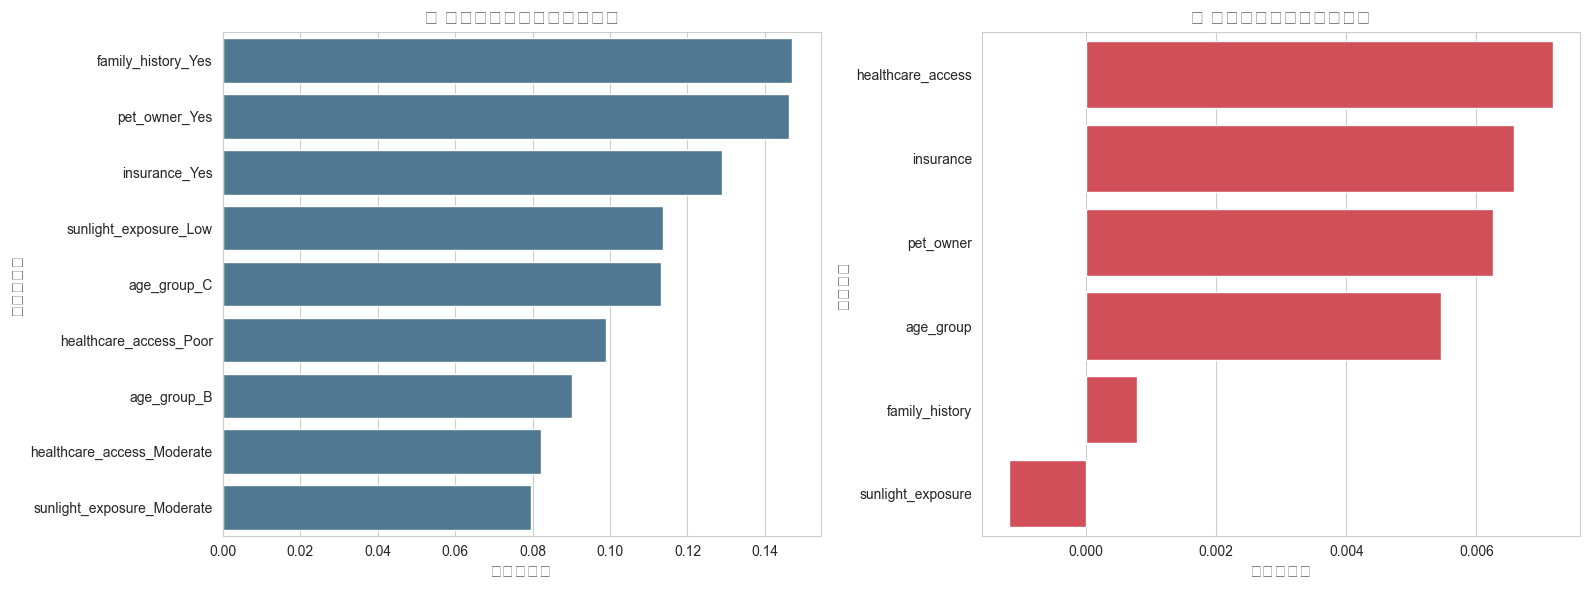


üî• È´òÈ£éÈô©ÁâπÂæÅÁªÑÂêàÔºàÊÇ£ÁóÖÊØî‰æãÈ´òÔºâÔºö
    age_group healthcare_access insurance sunlight_exposure family_history  \
66          A              Poor       Yes               Low            Yes   
167         C              Good       Yes          Moderate            Yes   
29          A          Moderate        No               Low             No   
61          A              Poor       Yes              High             No   
68          A              Poor       Yes          Moderate             No   
69          A              Poor       Yes          Moderate             No   
43          A          Moderate       Yes               Low            Yes   
17          A              Good       Yes               Low             No   
166         C              Good       Yes          Moderate            Yes   
48          A              Poor        No              High             No   

    pet_owner  diseased_ratio  Ê†∑Êú¨Èáè  
66         No        0.517241   58  
167      

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

# ---------------------- 1. Êï∞ÊçÆËØªÂèñ‰∏éÊ∏ÖÊ¥ó ----------------------
file_path = r"D:\111PythonLearning\data\try_class.csv"

df = pd.read_csv(file_path)

# Ê£ÄÊü•Áº∫Â§±ÂÄºÂπ∂Â§ÑÁêÜÔºàÁÆÄÂçïÂà†Èô§ÔºåÂèØÊ†πÊçÆÂÆûÈôÖË∞ÉÊï¥Ôºâ
print("\nüîç Áº∫Â§±ÂÄºÁªüËÆ°Ôºö")
missing = df.isnull().sum()
print(missing[missing > 0])
df.dropna(inplace=True)
print(f"üßπ Âà†Èô§Áº∫Â§±ÂÄºÂêéÔºåÂΩ¢Áä∂Ôºö{df.shape}")

# ÂÆö‰πâÁâπÂæÅÂíåÁõÆÊ†áÂàóÔºàËá™Âä®ËØÜÂà´ÔºåÂÅáËÆætarget‰∏∫ÊúÄÂêé‰∏ÄÂàóÊàñÊòæÂºèÂëΩÂêçÔºâ
target_col = 'target'  # ÈúÄÁ°Æ‰øùÊï∞ÊçÆ‰∏≠Â≠òÂú®Ê≠§Âàó
feature_cols = [col for col in df.columns if col != target_col]

if not feature_cols:
    print("‚ùå Êó†ÊúâÊïàÁâπÂæÅÂàóÔºÅ")
    exit()

# Êü•ÁúãÁõÆÊ†áÂèòÈáèÂàÜÂ∏ÉÔºàÂà§Êñ≠Á±ªÂà´Âπ≥Ë°°Â∫¶Ôºâ
print("\nüéØ ÁõÆÊ†áÂèòÈáèÂàÜÂ∏ÉÔºö")
print(df[target_col].value_counts(normalize=True))


# ---------------------- 2. Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÔºàÂàÜÁ±ªÁâπÂæÅÁºñÁ†ÅÔºâ ----------------------
# ÊâÄÊúâÁâπÂæÅÂùá‰∏∫ÂàÜÁ±ªÂèòÈáèÔºå‰ΩøÁî®Áã¨ÁÉ≠ÁºñÁ†Å
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_encoder', OneHotEncoder(drop='first', sparse_output=False), feature_cols)
    ]
)


# ---------------------- 3. Ê®°ÂûãÊûÑÂª∫ÔºàÈöèÊú∫Ê£ÆÊûó+Á±ªÂà´Âπ≥Ë°°Ôºâ ----------------------
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=150,      # Â¢ûÂä†Ê†ëÊï∞ÈáèÊèêÂçáÂ≠¶‰π†ËÉΩÂäõ
        max_depth=6,          # ÈôêÂà∂Ê∑±Â∫¶ÈÅøÂÖçËøáÊãüÂêà
        min_samples_split=15, # ÂáèÂ∞ëÂ∞èÂàÜÊîØ
        class_weight='balanced',  # ÂÖ≥ÈîÆÔºöÂπ≥Ë°°Á±ªÂà´ÊùÉÈáç
        random_state=42,
        n_jobs=-1             # Â§öÊ†∏Âä†ÈÄü
    ))
])


# ---------------------- 4. Ê®°ÂûãËØÑ‰º∞Ôºà‰∫§ÂèâÈ™åËØÅ+ÊµãËØïÈõÜÔºâ ----------------------
# ÂàÜÂ±ÇÂàíÂàÜËÆ≠ÁªÉÈõÜ&ÊµãËØïÈõÜ
X = df[feature_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5Êäò‰∫§ÂèâÈ™åËØÅÔºàÁî®F1Âä†ÊùÉÔºåÊõ¥ÈÄÇÂêà‰∏çÂπ≥Ë°°Êï∞ÊçÆÔºâ
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(f"\nüî¢ 5Êäò‰∫§ÂèâÈ™åËØÅF1ÔºàÂä†ÊùÉÔºâÔºö{cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}")

# ËÆ≠ÁªÉÂπ∂È¢ÑÊµã
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ÊµãËØïÈõÜÊä•Âëä
print("\nüìù ÊµãËØïÈõÜÂàÜÁ±ªÊä•ÂëäÔºö")
print(classification_report(y_test, y_pred))
print("üî¢ Ê∑∑Ê∑ÜÁü©ÈòµÔºö")
print(confusion_matrix(y_test, y_pred))


# ---------------------- 5. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûêÔºà‰øÆÊ≠£Ê†∏ÂøÉÈîôËØØÔºÅÔºâ ----------------------
# ========== ÊñπÊ≥ï1ÔºöÈöèÊú∫Ê£ÆÊûóÂÜÖÁΩÆÈáçË¶ÅÊÄßÔºàÁºñÁ†ÅÂêéÁâπÂæÅÔºâ ==========
rf = model.named_steps['classifier']
encoder = preprocessor.named_transformers_['cat_encoder']
encoded_features = encoder.get_feature_names_out(feature_cols)  # ÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÂêçÔºàÂ¶Ç age_group_AÔºâ

importances = pd.DataFrame({
    'ÁâπÂæÅ': encoded_features,  # ÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÔºàÁªÜÁ≤íÂ∫¶Ôºâ
    'ÂÜÖÁΩÆÈáçË¶ÅÊÄß': rf.feature_importances_
}).sort_values('ÂÜÖÁΩÆÈáçË¶ÅÊÄß', ascending=False)

# ========== ÊñπÊ≥ï2ÔºöÁΩÆÊç¢ÈáçË¶ÅÊÄßÔºàÂéüÂßãÁâπÂæÅÔºåÁ≤óÁ≤íÂ∫¶Ôºâ ==========
result = permutation_importance(
    model, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1
)
perm_importances = pd.DataFrame({
    'ÁâπÂæÅ': feature_cols,  # ÂéüÂßãÁâπÂæÅÂêçÔºàÂ¶Ç age_groupÔºâ
    'ÁΩÆÊç¢ÈáçË¶ÅÊÄß': result.importances_mean
}).sort_values('ÁΩÆÊç¢ÈáçË¶ÅÊÄß', ascending=False)


# ---------------------- 6. ÂèØËßÜÂåñÔºàÂàÜÂºÄÂ±ïÁ§∫‰∏§ÁßçÈáçË¶ÅÊÄßÔºâ ----------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Â≠êÂõæ1ÔºöÂÜÖÁΩÆÈáçË¶ÅÊÄßÔºàÁºñÁ†ÅÂêéÁâπÂæÅÔºåÁªÜÁ≤íÂ∫¶Ôºâ
sns.barplot(
    x='ÂÜÖÁΩÆÈáçË¶ÅÊÄß', y='ÁâπÂæÅ', data=importances.head(10),
    ax=axes[0], color='#457B9D'
)
axes[0].set_title('üîç ÂÜÖÁΩÆÈáçË¶ÅÊÄßÔºàÁºñÁ†ÅÂêéÁâπÂæÅÔºâ', fontsize=14)
axes[0].set_xlabel('ÈáçË¶ÅÊÄßÂæóÂàÜ', fontsize=12)
axes[0].set_ylabel('ÁºñÁ†ÅÂêéÁâπÂæÅ', fontsize=12)

# Â≠êÂõæ2ÔºöÁΩÆÊç¢ÈáçË¶ÅÊÄßÔºàÂéüÂßãÁâπÂæÅÔºåÁ≤óÁ≤íÂ∫¶Ôºâ
sns.barplot(
    x='ÁΩÆÊç¢ÈáçË¶ÅÊÄß', y='ÁâπÂæÅ', data=perm_importances.head(10),
    ax=axes[1], color='#E63946'
)
axes[1].set_title('üîç ÁΩÆÊç¢ÈáçË¶ÅÊÄßÔºàÂéüÂßãÁâπÂæÅÔºâ', fontsize=14)
axes[1].set_xlabel('ÈáçË¶ÅÊÄßÂæóÂàÜ', fontsize=12)
axes[1].set_ylabel('ÂéüÂßãÁâπÂæÅ', fontsize=12)

plt.tight_layout()
plt.show()


# ---------------------- 7. ÊåñÊéòÁâπÂæÅÁªÑÂêàËßÑÂæã ----------------------
def extract_rules(df, feature_cols, target_col, min_samples=50):
    """ÊèêÂèñÈ´ò/‰ΩéÈ£éÈô©ÁâπÂæÅÁªÑÂêà"""
    # Ëá™Âä®ËØÜÂà´ÊÇ£ÁóÖÊ†áÁ≠æÔºàÂÅáËÆæ‰∫åÂàÜÁ±ªÔºåÂèñ minority class ‰∏∫ diseasedÔºâ
    if df[target_col].dtype == 'object':
        diseased = df[target_col].value_counts().idxmin()
    else:
        diseased = 1 if (df[target_col].mean() < 0.5) else 0

    # ÂàÜÁªÑËÆ°ÁÆóÊÇ£ÁóÖÊØî‰æã
    grouped = df.groupby(feature_cols)[target_col].apply(
        lambda x: (x == diseased).mean()
    ).reset_index(name='diseased_ratio')

    # Ê†∑Êú¨ÈáèËøáÊª§
    count_df = df.groupby(feature_cols).size().reset_index(name='Ê†∑Êú¨Èáè')
    rules = pd.merge(grouped, count_df, on=feature_cols)
    rules = rules[rules['Ê†∑Êú¨Èáè'] >= min_samples]

    # ÊéíÂ∫è
    high_risk = rules.sort_values('diseased_ratio', ascending=False).head(10)
    low_risk = rules.sort_values('diseased_ratio', ascending=True).head(10)

    return high_risk, low_risk

high_risk, low_risk = extract_rules(df, feature_cols, target_col)
print("\nüî• È´òÈ£éÈô©ÁâπÂæÅÁªÑÂêàÔºàÊÇ£ÁóÖÊØî‰æãÈ´òÔºâÔºö")
print(high_risk)
print("\n‚ùÑÔ∏è ‰ΩéÈ£éÈô©ÁâπÂæÅÁªÑÂêàÔºàÊÇ£ÁóÖÊØî‰æã‰ΩéÔºâÔºö")
print(low_risk)